<div style="text-align: center; font-family: 'Trebuchet MS', Arial, sans-serif; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0">
  TOPIC: ANALYSIS ON SPOTIFY MUSIC DATASET
</div>

### WHAT THIS NOTEBOOK DOES?
- In this notebook, I will create a model in order to make prediction whether a song will get popular or not?
- The models I choose to implement this idea are: Random forest, Naive Bayes and Multi-layer perceptron classifier.

### State the problem:
Forecasting a song's popularity is a challenging yet crucial task with extensive applications in the music industry. It involves analyzing factors like musical composition, artist popularity, and cultural trends. Accurate predictions aid record labels, streaming platforms, and artists in optimizing marketing strategies and enhancing the overall music consumption experience. Successfully navigating this dynamic landscape would benefit us a lots in many aspects.

### Why we need these model?

Lets's take some examples. Composers, producers, and publishers can use such a model to evaluate their songs before releasing them, and to optimize their marketing strategies. They can also use the model to discover new talents and potential hits. Listeners can use the model to find new songs that match their preferences and tastes. Streaming platforms can use the model to improve their recommendation systems and playlists.



## Table of content:
* [IMPORT LIBRARY](#IMPORT-LIBRARY)
* [PREPROCESSING DATA](#PREPROCESSING-DATA)
* [IMPORT LIBRARY FOR MODEL](#IMPORT-LIBRARY-FOR-MODEL)
* [MODEL 1: RANDOM FOREST CLASSIFIER](#MODEL-1:-RANDOM-FOREST-CLASSIFIER)
* [MODEL 2: NAIVE BAYES CLASSIFIER](#MODEL-2:-NAIVE-BAYES-CLASSIFIER)
* [MODEL 3: MULTI-LAYER PERCEPTRON CLASSIFIER](#MODEL-3:-MULTI-LAYER-PERCEPTRON-CLASSIFIER)

### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
#warning
import warnings

#read files
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#### Read from file

In [2]:
df = pd.read_csv("../data/clean_data.csv")

In [3]:
df.head(5)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,You Need To Calm Down,Lover,Taylor Swift,2019-08-23,171360,84,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,85.026,4
1,"thank u, next","thank u, next",Ariana Grande,2019-02-08,207320,82,0.717,0.22900,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4
2,EARFQUAKE,IGOR,"Tyler, The Creator",2019-05-17,190066,82,0.554,0.23000,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4
3,Lose You To Love Me,Rare,Selena Gomez,2020-01-10,206458,82,0.488,0.55600,0.343,0.000000,0.2100,-8.985,0.0436,102.819,4
4,High Hopes,Pray for the Wicked,Panic! At The Disco,2018-06-22,190946,82,0.579,0.19300,0.904,0.000000,0.0640,-2.729,0.0618,82.014,4


### PREPROCESSING DATA

In [4]:
warnings.filterwarnings('ignore')
#Extract features
famous_singer = df.artist.value_counts()
famous_singer = pd.value_counts(df.artist).iloc[:15].index.tolist()
df['star'] = np.where(df['artist'].isin(famous_singer), True ,  False)

In [5]:
df_new = df[['name', 'album', 'artist', 'release_date', 'length', 
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','popularity','star']]

In [6]:
warnings.filterwarnings('ignore')
#Encoding for hotness
df_new.loc[(df_new['popularity'] >= 80), 'hotness'] = 5
df_new.loc[(df_new['popularity'] < 80) & (df_new['popularity'] >= 60), 'hotness'] = 4
df_new.loc[(df_new['popularity'] < 60) & (df_new['popularity'] >= 40), 'hotness'] = 3
df_new.loc[(df_new['popularity'] < 40) & (df_new['popularity'] >= 20), 'hotness'] = 2
df_new.loc[(df_new['popularity'] < 20) , 'hotness'] = 1


In [7]:
hotness = df_new[['hotness']].copy()
df_new = df_new.drop(columns= ['popularity','hotness','name', 'album', 'artist', 'release_date'],axis = 1)

In [8]:
df_new.isna().sum()

length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
star                0
dtype: int64

In [9]:
#merge data
df_new = pd.concat([df_new, hotness], axis  =1)
df_new.head(10)

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,star,hotness
0,171360,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,85.026,4,True,5.0
1,207320,0.717,0.22900,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4,True,5.0
2,190066,0.554,0.23000,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4,False,5.0
3,206458,0.488,0.55600,0.343,0.000000,0.2100,-8.985,0.0436,102.819,4,False,5.0
4,190946,0.579,0.19300,0.904,0.000000,0.0640,-2.729,0.0618,82.014,4,False,5.0
5,231266,0.680,0.33100,0.578,0.000000,0.1350,-5.804,0.0400,145.038,4,False,5.0
6,240050,0.623,0.32800,0.692,0.000000,0.1530,-5.122,0.0504,79.899,4,False,5.0
7,181026,0.842,0.04270,0.734,0.000000,0.1060,-5.065,0.0588,137.958,4,False,5.0
8,157605,0.880,0.17700,0.751,0.000064,0.1060,-4.258,0.0874,117.948,4,False,5.0
9,180522,0.889,0.25900,0.496,0.000000,0.2520,-6.365,0.0905,86.003,4,False,5.0


#### Visualiation some columns

In [10]:
df_new['hotness'].value_counts()


hotness
4.0    1139
3.0     570
5.0     530
1.0     379
2.0     174
Name: count, dtype: int64

Text(0.5, 1.0, 'Target variable count plot')

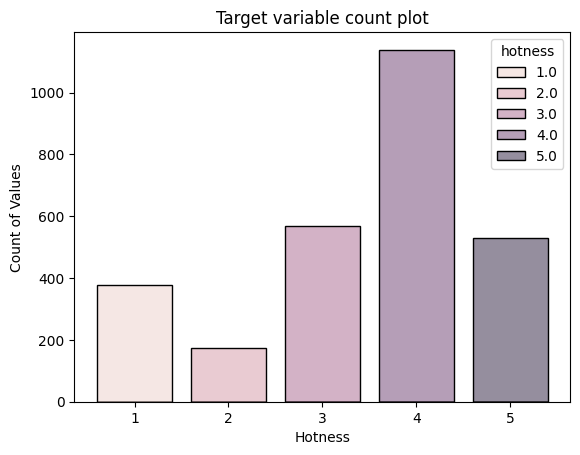

In [11]:
num_bins = 100
sns.histplot(data = df_new, x = 'hotness', hue = 'hotness'
            ,discrete= True, shrink= 0.8)
plt.xlabel("Hotness")
plt.ylabel("Count of Values")
plt.title("Target variable count plot")


In [12]:
# Saving processed data for later use
df_new.to_csv("../data/processed_data.csv", index= False)

### IMPORT LIBRARY FOR MODEL

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [14]:
X = df_new.iloc[:,:12]
y = df_new.iloc[:,-1]

In [15]:
#Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 99)


### MODEL 1: RANDOM FOREST CLASSIFIER

#### BUILD MODEL

In [16]:
#Create model
clf = RandomForestClassifier(criterion= "gini",
                             max_depth= 8,
                             n_estimators = 5,
                             bootstrap=True,
                             random_state= 5)

In [17]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=5, random_state=5)

In [18]:
clf.feature_importances_

array([2.34129505e-02, 2.22062144e-02, 3.10463937e-02, 3.28548457e-02,
       1.67039989e-02, 2.38157788e-02, 2.87110083e-02, 2.83375986e-02,
       1.61191303e-02, 4.13089036e-04, 3.16806071e-03, 7.73210931e-01])

#### Testing

In [19]:
y_pred = clf.predict(X_test)

In [20]:
y_pred

array([3., 4., 5., 1., 4., 5., 5., 2., 4., 5., 1., 4., 4., 3., 3., 5., 4.,
       5., 3., 4., 3., 3., 5., 4., 1., 1., 4., 4., 2., 4., 4., 4., 4., 5.,
       4., 3., 4., 5., 3., 5., 1., 3., 4., 4., 3., 3., 2., 3., 3., 4., 4.,
       4., 3., 4., 1., 5., 3., 5., 4., 3., 4., 1., 4., 2., 3., 3., 4., 4.,
       4., 3., 5., 3., 3., 2., 5., 4., 4., 3., 4., 4., 1., 2., 1., 4., 5.,
       3., 5., 3., 5., 4., 1., 5., 5., 5., 5., 4., 5., 1., 1., 3., 1., 2.,
       3., 5., 3., 2., 4., 5., 5., 5., 3., 2., 4., 3., 5., 5., 4., 4., 5.,
       1., 4., 4., 1., 1., 3., 4., 5., 4., 2., 4., 4., 4., 4., 4., 2., 4.,
       3., 5., 1., 4., 1., 1., 3., 4., 1., 5., 3., 4., 5., 4., 5., 1., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 3., 5., 5., 3., 4., 5., 4., 5., 4.,
       4., 4., 5., 1., 1., 5., 3., 4., 3., 3., 4., 5., 4., 3., 3., 4., 3.,
       5., 1., 3., 4., 1., 5., 3., 1., 4., 4., 4., 1., 1., 4., 4., 3., 4.,
       4., 3., 4., 5., 4., 5., 1., 3., 4., 5., 4., 4., 1., 3., 4., 4., 1.,
       4., 3., 2., 4., 4.

In [21]:
confusion_matrix(y_test, y_pred)

array([[104,   1,   1,   1,   0],
       [  0,  37,   0,   0,   0],
       [  0,   1, 144,   0,   0],
       [  0,   0,   0, 283,   4],
       [  0,   0,   0,   0, 122]], dtype=int64)

In [22]:
print("Accuracy score of Random forest model:" , accuracy_score(y_test, y_pred))

Accuracy score of Random forest model: 0.9885386819484241


In [23]:
cross_val_score(clf,X_train,y_train,cv = 10)

array([0.98571429, 0.96666667, 0.98571429, 0.9952381 , 0.99043062,
       0.97607656, 0.96650718, 0.94736842, 1.        , 0.97129187])

In [24]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.97      1.00      0.99       104
         2.0       1.00      0.95      0.97        39
         3.0       0.99      0.99      0.99       145
         4.0       0.99      1.00      0.99       284
         5.0       1.00      0.97      0.98       126

    accuracy                           0.99       698
   macro avg       0.99      0.98      0.99       698
weighted avg       0.99      0.99      0.99       698



### MODEL 2: NAIVE BAYES CLASSIFIER

#### Necessary library

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

#### Scale data

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Build model

In [27]:
NBC = GaussianNB()
NBC.fit(X_train, y_train)
NBC_scaled = GaussianNB()
NBC_scaled.fit(X_train_scaled, y_train)

GaussianNB()

#### Testing without scaled data

In [28]:
NBC_predict = NBC.predict(X_test)
print("Prediksi Naive Bayes : ",NBC_predict)

Prediksi Naive Bayes :  [4. 2. 4. 1. 4. 4. 4. 2. 4. 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4.
 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 1. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 2. 1. 4. 4. 4. 4. 4. 4. 1. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 1. 4. 1. 4. 4. 4. 4. 3. 4. 4. 1. 4. 4. 4. 4. 4.
 4. 1. 1. 4. 1. 2. 4. 4. 3. 2. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 1.
 4. 4. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 3. 4. 4. 4. 1. 4. 1. 1. 4. 4.
 1. 4. 2. 2. 4. 4. 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 1. 1. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 1. 4. 4. 1.
 4. 4. 1. 4. 4. 4. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 1. 3. 4. 4. 4. 4.
 1. 3. 4. 4. 1. 4. 4. 3. 4. 4. 4. 4. 4. 4. 1. 4. 4. 4. 1. 4. 4. 4. 4. 3.
 4. 4. 4. 4. 1. 4. 4. 4. 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 1. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 1. 4. 4. 4. 3. 1.
 4. 4. 2. 4. 3. 3. 4. 4. 4. 4. 4. 1. 4. 2. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 4. 4. 3. 4. 1. 1.

In [29]:
confusion_matrix(y_test, NBC_predict)

array([[ 99,   3,   5,   0,   0],
       [  0,   6,   5,  26,   0],
       [  0,   5,   8, 132,   0],
       [  0,  10,   8, 269,   0],
       [  0,   0,   1, 117,   4]], dtype=int64)

In [30]:
print("Accuracy score of Naive Bayes without scaled:" , accuracy_score(y_test, NBC_predict))

Accuracy score of Naive Bayes without scaled: 0.5530085959885387


In [31]:
print(classification_report(NBC_predict, y_test))

              precision    recall  f1-score   support

         1.0       0.93      1.00      0.96        99
         2.0       0.16      0.25      0.20        24
         3.0       0.06      0.30      0.09        27
         4.0       0.94      0.49      0.65       544
         5.0       0.03      1.00      0.06         4

    accuracy                           0.55       698
   macro avg       0.42      0.61      0.39       698
weighted avg       0.87      0.55      0.65       698



#### Test with scale data

In [32]:
NBC_scaled_predict = NBC_scaled.predict(X_test_scaled)
print("Prediksi Naive Bayes : ",NBC_scaled_predict)

Prediksi Naive Bayes :  [3. 4. 5. 1. 4. 5. 5. 2. 4. 5. 1. 4. 4. 3. 3. 5. 4. 5. 3. 4. 3. 3. 5. 4.
 1. 1. 4. 4. 3. 4. 4. 4. 4. 4. 4. 3. 4. 5. 3. 5. 1. 3. 4. 4. 3. 3. 2. 3.
 3. 4. 4. 4. 3. 4. 1. 5. 3. 5. 4. 3. 4. 1. 4. 2. 3. 3. 4. 4. 4. 3. 5. 3.
 3. 2. 5. 4. 4. 3. 4. 4. 1. 2. 1. 4. 5. 3. 5. 3. 5. 4. 1. 5. 5. 5. 5. 4.
 5. 1. 1. 3. 1. 2. 3. 5. 3. 2. 4. 5. 5. 5. 3. 2. 4. 3. 5. 5. 4. 4. 5. 1.
 4. 4. 1. 1. 3. 4. 5. 4. 2. 4. 4. 4. 4. 4. 2. 4. 3. 5. 1. 4. 1. 1. 3. 4.
 1. 5. 3. 4. 5. 4. 5. 1. 4. 4. 5. 4. 5. 4. 4. 4. 4. 3. 5. 5. 3. 4. 5. 4.
 5. 4. 4. 4. 5. 1. 1. 5. 3. 4. 3. 3. 4. 5. 4. 3. 3. 4. 3. 5. 1. 3. 4. 1.
 5. 3. 1. 4. 4. 4. 1. 1. 4. 4. 3. 4. 4. 3. 4. 5. 4. 5. 1. 3. 4. 5. 4. 4.
 1. 3. 4. 4. 1. 4. 3. 2. 4. 4. 4. 4. 3. 3. 1. 2. 5. 5. 1. 3. 3. 4. 3. 1.
 3. 4. 5. 3. 1. 4. 4. 4. 4. 1. 4. 4. 3. 4. 3. 5. 4. 3. 3. 5. 5. 3. 1. 4.
 4. 4. 5. 3. 4. 4. 5. 4. 4. 3. 5. 4. 4. 3. 5. 3. 3. 4. 1. 4. 3. 4. 4. 1.
 5. 4. 4. 5. 2. 2. 4. 4. 4. 2. 4. 1. 3. 3. 1. 3. 4. 4. 4. 3. 2. 5. 2. 4.
 4. 3. 5. 4. 2. 4. 5. 1. 1.

In [33]:
confusion_matrix(y_test, NBC_scaled_predict)

array([[107,   0,   0,   0,   0],
       [  0,  37,   0,   0,   0],
       [  0,   0, 145,   0,   0],
       [  0,   0,   0, 287,   0],
       [  0,   0,   0,   0, 122]], dtype=int64)

In [34]:
print("Accuracy score of Naive Bayes with scaled test input:" , accuracy_score(y_test, NBC_scaled_predict))

Accuracy score of Naive Bayes with scaled test input: 1.0


In [35]:
print(classification_report(NBC_scaled_predict, y_test))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       107
         2.0       1.00      1.00      1.00        37
         3.0       1.00      1.00      1.00       145
         4.0       1.00      1.00      1.00       287
         5.0       1.00      1.00      1.00       122

    accuracy                           1.00       698
   macro avg       1.00      1.00      1.00       698
weighted avg       1.00      1.00      1.00       698



### MODEL 3: MULTI-LAYER PERCEPTRON CLASSIFIER

#### Necessary library

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

#### Build model

In [37]:
warnings.filterwarnings('ignore')
MLPC_model = MLPClassifier(random_state= 5, max_iter=30).fit(X_train_scaled, y_train)

#### Testing

In [38]:
MLPC_model.predict_proba(X_test_scaled[:1])


array([[0.03798996, 0.04779745, 0.74982229, 0.16343628, 0.00095402]])

In [39]:
MLPC_scaled_predict = MLPC_model.predict(X_test_scaled)

In [40]:
MLPC_model.score(X_test_scaled, y_test)


0.9469914040114613

In [41]:
confusion_matrix(y_test, MLPC_scaled_predict)

array([[106,   1,   0,   0,   0],
       [ 25,   5,   7,   0,   0],
       [  0,   0, 141,   4,   0],
       [  0,   0,   0, 287,   0],
       [  0,   0,   0,   0, 122]], dtype=int64)

In [42]:
print(classification_report(MLPC_scaled_predict, y_test))

              precision    recall  f1-score   support

         1.0       0.99      0.81      0.89       131
         2.0       0.14      0.83      0.23         6
         3.0       0.97      0.95      0.96       148
         4.0       1.00      0.99      0.99       291
         5.0       1.00      1.00      1.00       122

    accuracy                           0.95       698
   macro avg       0.82      0.92      0.82       698
weighted avg       0.98      0.95      0.96       698

